In [1]:
'''A Scalable, Noise-Tolerant Bagging approach to the Buckshot Algorithm.
Reference to the original buckshot algorithm (https://pdfs.semanticscholar.org/1134/3448f8a817fa391e3a7897a95f975ad2873a.pdf)'''

In [1]:
from numpy.random import choice
from pandas import read_csv, DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from functools import reduce
import os, sys
# sys.path.insert(0, 'C:/Users/jjung/Documents/GitHub/News-Spam-Detect/TxtClus/')
sys.path.insert(0, '/home/jz/proj/News-Spam-Detect/TxtClus')
from baggedBuckshot import Clusterings

In [2]:
def plot_mult_samples(listOf_df, row_name):     
    '''For each bootstrap iteration, plot metrics across K''' 
    for i in range(len(listOf_df)):
        plt.plot(list(listOf_df[i].columns), list(listOf_df[i].loc[row_name,:]), c="green")  
    
    # Use the reduce function to do elementwise average for several data frames:
    avg_metrics = reduce(lambda df1, df2: df1.add(df2), listOf_df).div(len(listOf_df))        
    plt.plot(list(avg_metrics.columns), list(avg_metrics.loc[row_name,:]), c="red")    
    plt.ylabel(row_name + ' score')   
    plt.xlabel('no. of clusters')        
    plt.show()            

In [3]:
if __name__ == "__main__":
    # Pass in settings to instantiate a Clusterings object called vecSpaceMod1:
    vecSpaceMod = Clusterings({'file_loc': sys.path[0] + '/Input/newsSample.csv',
                               'tf_dampen': True,
                               'common_word_pct': 1,
                               'rare_word_pct': 1,
                               'dim_redu': False})

In [ ]:
    news_df = vecSpaceMod.get_file() # Read CSV input to data frame.

In [4]:
    # Repeatedly run kmeans on resamples, compute the silhouette and calinski metrics for each K that I plug in.  
    metrics_byK = vecSpaceMod.buckshot(news_df)        

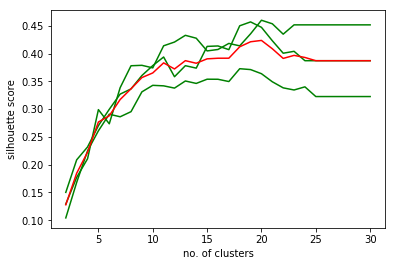

In [5]:
    plot_mult_samples(metrics_byK, 'silhouette')

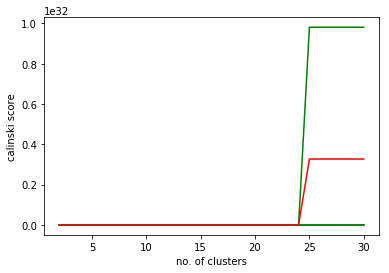

In [6]:
    plot_mult_samples(metrics_byK, 'calinski')

In [ ]:
    X = vecSpaceMod.term_weight_matr(news_df.TITLE)
    kmeans_fit = KMeans(20).fit(X)

In [ ]:
    df = DataFrame({'predictedCluster': kmeans_fit.labels_,
                    'document': news_df.TITLE})
    df.sort_values(by='predictedCluster', inplace=True)

In [ ]:
# df = DataFrame({'predictedCluster': KMeans(20).fit(X1).labels_,
#                         'document': term_weight_obj['samp']}).sort_values(by='predictedCluster')